In [36]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [37]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [38]:
def process_operations(state: AgentState) -> AgentState:
    """this function handels multible different inputs"""
    print(state)

    if state['operation'] == '+':
        state["result"] = f"hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state['operation'] == '*':
        product = 1
        for value in state['values']:
            product *= value
        state["result"] = f"hi {state['name']}, your answer is: {product}"
    print(state)
    return state

In [39]:
graph = StateGraph(AgentState)
graph.add_node("process_operations", process_operations)
graph.set_entry_point("process_operations")
graph.add_edge(START, "process_operations")
graph.set_finish_point("process_operations")
app = graph.compile()

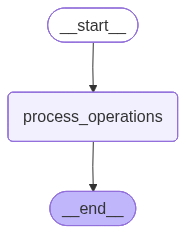

In [40]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
results = app.invoke({"name": "bob", "values": [1, 2, 3, 4, 5], "operation": "-"})

{'name': 'bob', 'values': [1, 2, 3, 4, 5], 'operation': '-'}
{'name': 'bob', 'values': [1, 2, 3, 4, 5], 'operation': '-'}
